In [1]:
import json
import lightgbm as lgb
import pandas as pd
import scipy.io as scio
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16,8
#plt.rcParams['xtick.color'] = 'w'
#plt.rcParams['ytick.color'] = 'w'

# 读入数据

In [2]:
data_path = r"../data/data.mat"
print("load data")
data = scio.loadmat(data_path)

datainptrain = data['datainptrain']
dataouttrain = data['dataouttrain']
datainptest = data['datainptest']
dataouttest = data['dataouttest']

'''
X_train = datainptrain
y_train = dataouttrain
X_test = datainptest
y_test = dataouttest

'''
X_test = datainptrain
y_test = dataouttrain
X_train = datainptest
y_train = dataouttest

load data


In [3]:
print('X_train.shape: ',X_train.shape)
print('y_train.shape: ',y_train.shape)
print('X_test.shape: ',X_test.shape)
print('y_test.shape: ',y_test.shape)

X_train.shape:  (4165, 19)
y_train.shape:  (4165, 5)
X_test.shape:  (830, 19)
y_test.shape:  (830, 5)


# 打乱数据

In [4]:
print(X_train.shape,y_train.shape)
full_train = np.concatenate((X_train,y_train),axis=1)
print(full_train.shape)
np.random.shuffle(full_train)
X_train = full_train[:,0:19]
y_train = full_train[:,19:]
print(X_train.shape,y_train.shape)

(4165, 19) (4165, 5)
(4165, 24)
(4165, 19) (4165, 5)


# model fit and predict

In [5]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, roc_curve, auc

In [6]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
print(model.score(X_train, y_train), model.score(X_test, y_test))

0.9997599039615847 0.9987951807228915


In [8]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9987951807228915


# learning curve

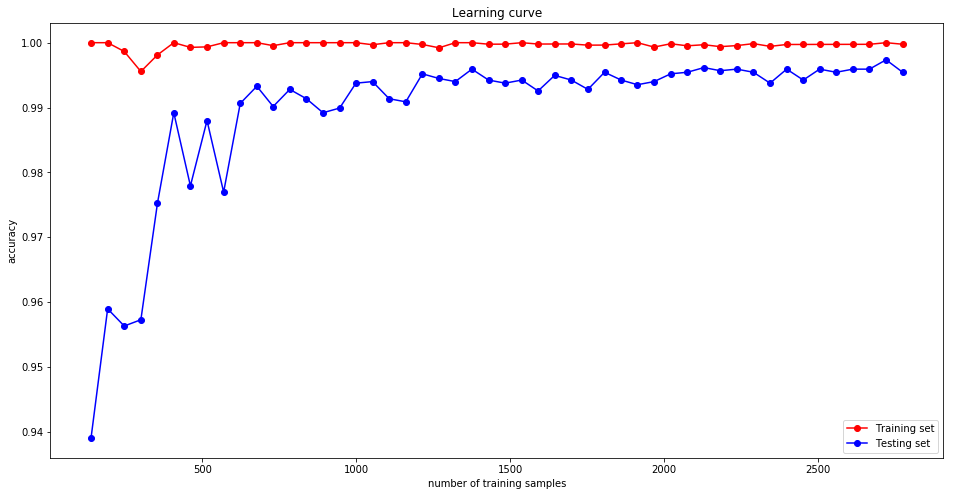

In [22]:
lc_x, lc_train, lc_test = learning_curve(model, X_train,y_train,train_sizes=np.linspace(0.05,1,50))
lc_train = np.mean(lc_train,axis=1)
lc_test = np.mean(lc_test,axis=1)
plt.figure()
plt.rcParams['figure.figsize'] = 16,8
plt.plot(lc_x,lc_train,'o-',color='red',label='Training set')
plt.plot(lc_x,lc_test,'o-',color='blue',label='Testing set')
plt.legend()
plt.title('Learning curve')
plt.xlabel('number of training samples')
plt.ylabel('accuracy')
plt.savefig('learning_curve.png')
plt.show()

# prediction error varies with training sample number 

In [ ]:
acc = [list() for i in range(X_train.shape[0])]
for num_train in range(1,X_train.shape[0]+1,1):
    X_train_new = X_train[:num_train]
    y_train_new = y_train[:num_train]
    model.fit(X_train_new,y_train_new)
    acc[num_train-1] = model.score(X_test,y_test)

In [ ]:
plt.figure()
plt.rcParams['figure.figsize'] = 16,8
num_train_xaxis = np.arange(X_train.shape[0])
plt.title('Test accuracy varies with number of training data')
plt.xlabel('number of training data')
plt.ylabel('test accuracy')
plt.plot(num_train_xaxis,acc,color='red')
#plt.savefig('2.png')
plt.show()

In [ ]:
num_start = 30
num_stop = 200
plt.figure()
plt.rcParams['figure.figsize'] = 16,8
num_train_xaxis = np.arange(X_train.shape[0])
plt.title('Test accuracy varies with number of training data')
plt.xlabel('number of training data')
plt.ylabel('test accuracy')
plt.plot(num_train_xaxis[num_start:num_stop],acc[num_start:num_stop],color='red')
#plt.savefig('4.png')
plt.show()

# 多次学习测试精度图

In [11]:
x_temp = np.arange(30)
acc_multi_times = [[] for i in range(30)]
for i in range(30):
    model.fit(X_train,y_train)
    acc_multi_times[i] = model.score(X_test,y_test)

In [12]:
acc_multi_times2 = [[] for i in range(30)]
for i in range(30):
    model.fit(X_train[0:800],y_train[0:800])
    acc_multi_times2[i] = model.score(X_test,y_test)

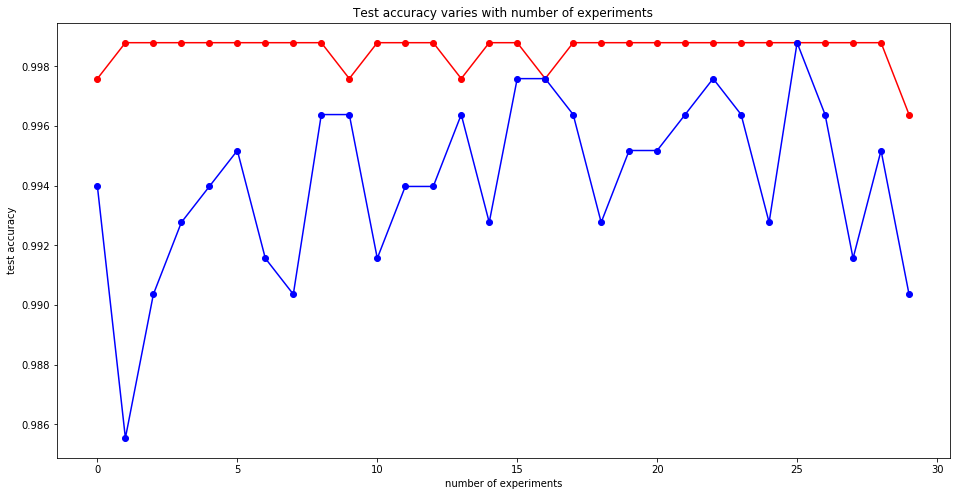

In [15]:
plt.figure()
plt.rcParams['figure.figsize'] = 16,8
plt.title('Test accuracy varies with number of experiments')
plt.xlabel('number of experiments')
plt.ylabel('test accuracy')
plt.plot(x_temp,acc_multi_times,'o-',color='red')
plt.plot(x_temp,acc_multi_times2,'o-',color='blue')
plt.savefig('2-2.png')
plt.show()